# Bibliotecas:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


# Extração:

In [10]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# Lê diretamente em um DataFrame
df = pd.read_json(url)

# Transformação:

In [11]:
# Expandindo cada coluna aninhada separadamente
df_customer = pd.json_normalize(df["customer"])
df_phone = pd.json_normalize(df["phone"])
df_internet = pd.json_normalize(df["internet"])
df_account = pd.json_normalize(df["account"])

# Removendo colunas originais aninhadas
df = df.drop(columns=["customer", "phone", "internet", "account"])

# Unindo tudo em um único DataFrame
df = pd.concat(
    [df, df_customer, df_phone, df_internet, df_account],
    axis=1
)

print("Dimensão após normalização:", df.shape)

Dimensão após normalização: (7267, 21)


In [12]:
# Tratamento da variável alvo (Churn)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Conversão das variáveis numéricas corretas
cols_numericas = ["tenure", "Charges.Monthly", "Charges.Total"]

for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Verificação e remoção de valores ausentes
print("\nValores ausentes nas variáveis numéricas:")
print(df[cols_numericas].isnull().sum())

df = df.dropna(subset=cols_numericas)

print("Dimensão após remoção de NA:", df.shape)

# Padronização de categorias redundantes
df.replace(
    {
        "No internet service": "No",
        "No phone service": "No"
    },
    inplace=True
)

# Remoção de coluna sem valor analítico

df = df.drop(columns=["customerID"])

# Verificação final do dataset
print("\nEstrutura final dos dados:")
df.info()

print("\nPrimeiras linhas da base tratada:")
df.head()


Valores ausentes nas variáveis numéricas:
tenure              0
Charges.Monthly     0
Charges.Total      11
dtype: int64
Dimensão após remoção de NA: (7256, 21)

Estrutura final dos dados:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [8]:
print(df.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')


In [13]:
# Codificação das variáveis categóricas

cols_categoricas = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Aplicação do One-Hot Encoding
df_encoded = pd.get_dummies(
    df,
    columns=cols_categoricas,
    drop_first=True
)

# Verificação do novo formato
print("Dimensão após encoding:", df_encoded.shape)
df_encoded.head()


Dimensão após encoding: (7256, 24)


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0,9,59.9,542.40,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,1.0,0,4,73.9,280.85,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1.0,1,13,98.0,1237.85,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1.0,1,3,83.9,267.40,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [21]:
# Remover observações com Churn indefinido
print("Valores ausentes em Churn antes da limpeza:")
print(df_encoded["Churn"].isnull().sum())

df_encoded = df_encoded.dropna(subset=["Churn"])

print("Valores ausentes em Churn após a limpeza:")
print(df_encoded["Churn"].isnull().sum())

Valores ausentes em Churn antes da limpeza:
0
Valores ausentes em Churn após a limpeza:
0


In [14]:
# ANÁLISE DA PROPORÇÃO DE CHURN (DESEQUILÍBRIO DE CLASSES)

# Contagem absoluta das classes
contagem_classes = df_encoded["Churn"].value_counts()

# Proporção relativa (%)
proporcao_classes = df_encoded["Churn"].value_counts(normalize=True) * 100

# Organização em um DataFrame para melhor leitura
df_churn_ratio = pd.DataFrame({
    "Quantidade": contagem_classes,
    "Proporção (%)": proporcao_classes.round(2)
})

# Renomeando os índices para melhor interpretação
df_churn_ratio.index = ["Clientes Ativos (0)", "Clientes Evadidos (1)"]

# Exibição dos resultados
print("Distribuição de clientes por classe (Churn):\n")
print(df_churn_ratio)

# =====================================================
# AVALIAÇÃO DO DESEQUILÍBRIO ENTRE CLASSES
# =====================================================

# Cálculo da razão entre as classes
razao_classes = contagem_classes[0] / contagem_classes[1]

print("\nRazão entre clientes ativos e evadidos:")
print(f"{razao_classes:.2f} : 1")

# =====================================================
# INTERPRETAÇÃO AUTOMÁTICA
# =====================================================

if proporcao_classes.min() < 30:
    print("\n⚠️ Atenção: Há desequilíbrio entre as classes.")
    print("Isso pode afetar o desempenho de modelos preditivos.")
    print("Técnicas como reamostragem (SMOTE), ajuste de pesos ou métricas adequadas")
    print("devem ser consideradas na etapa de modelagem.")
else:
    print("\n✅ As classes estão relativamente balanceadas.")
    print("Modelos preditivos podem ser treinados sem ajustes especiais.")


Distribuição de clientes por classe (Churn):

                       Quantidade  Proporção (%)
Clientes Ativos (0)          5163          73.42
Clientes Evadidos (1)        1869          26.58

Razão entre clientes ativos e evadidos:
2.76 : 1

⚠️ Atenção: Há desequilíbrio entre as classes.
Isso pode afetar o desempenho de modelos preditivos.
Técnicas como reamostragem (SMOTE), ajuste de pesos ou métricas adequadas
devem ser consideradas na etapa de modelagem.


In [ ]:
# Separação de variáveis explicativas e alvo
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Divisão treino/teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("\nDistribuição original no treino (%):")
print(y_train.value_counts(normalize=True) * 100)

# UNDERSAMPLING
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("\nDistribuição após UNDERSAMPLING (%):")
print(y_train_under.value_counts(normalize=True) * 100)

# OVERSAMPLING
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

print("\nDistribuição após OVERSAMPLING (%):")
print(y_train_over.value_counts(normalize=True) * 100)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribuição após SMOTE (%):")
print(y_train_smote.value_counts(normalize=True) * 100)

# Comparação dos tamanhos
print("\nTamanhos dos conjuntos de treino:")
print(f"Original: {X_train.shape}")
print(f"Undersampling: {X_train_under.shape}")
print(f"Oversampling: {X_train_over.shape}")
print(f"SMOTE: {X_train_smote.shape}")


Valores ausentes em Churn antes da limpeza:
224
Valores ausentes em Churn após a limpeza:
0

Distribuição original no treino (%):
Churn
0.0    73.425437
1.0    26.574563
Name: proportion, dtype: float64

Distribuição após UNDERSAMPLING (%):
Churn
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Distribuição após OVERSAMPLING (%):
Churn
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64

Distribuição após SMOTE (%):
Churn
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64

Tamanhos dos conjuntos de treino:
Original: (4922, 23)
Undersampling: (2616, 23)
Oversampling: (7228, 23)
SMOTE: (7228, 23)


In [ ]:
# PADRONIZAÇÃO DOS DADOS (STANDARDIZATION)

# Identificação das colunas numéricas contínuas
cols_numericas = ["tenure", "Charges.Monthly", "Charges.Total"]

# ECriação do scaler
scaler = StandardScaler()

# Ajuste do scaler APENAS no treino (SMOTE)
X_train_smote_scaled = X_train_smote.copy()
X_test_scaled = X_test.copy()

X_train_smote_scaled[cols_numericas] = scaler.fit_transform(
    X_train_smote[cols_numericas]
)

# Aplicação da transformação no conjunto de teste
X_test_scaled[cols_numericas] = scaler.transform(
    X_test[cols_numericas]
)

# Verificação estatística da padronização
print("Médias após padronização (treino):")
print(X_train_smote_scaled[cols_numericas].mean().round(4))

print("\nDesvios-padrão após padronização (treino):")
print(X_train_smote_scaled[cols_numericas].std().round(4))


Médias após padronização (treino):
tenure             0.0
Charges.Monthly    0.0
Charges.Total     -0.0
dtype: float64

Desvios-padrão após padronização (treino):
tenure             1.0001
Charges.Monthly    1.0001
Charges.Total      1.0001
dtype: float64


# Análise:

Matriz de correlação:
                    Churn    tenure  Charges.Monthly  Charges.Total
Churn            1.000000 -0.354049         0.192858      -0.199484
tenure          -0.354049  1.000000         0.246862       0.825880
Charges.Monthly  0.192858  0.246862         1.000000       0.651065
Charges.Total   -0.199484  0.825880         0.651065       1.000000


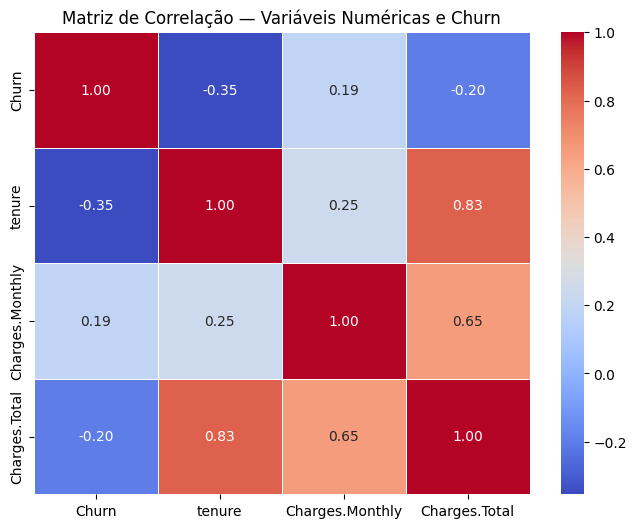


Correlação das variáveis com o Churn:
Charges.Monthly    0.192858
Charges.Total     -0.199484
tenure            -0.354049
Name: Churn, dtype: float64


In [ ]:
# Visualização da matriz de correlação entre variáveis numéricas
# Objetivo: identificar relações com a evasão (Churn)

# Seleção apenas das variáveis numéricas
df_numerico = df_encoded[["Churn", "tenure", "Charges.Monthly", "Charges.Total"]]

# Cálculo da matriz de correlação (Pearson)
matriz_correlacao = df_numerico.corr()

# Exibição da matriz de correlação numérica
print("Matriz de correlação:")
print(matriz_correlacao)

# Criação do heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacao,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Matriz de Correlação — Variáveis Numéricas e Churn")
plt.show()

# Correlação específica com a variável alvo
print("\nCorrelação das variáveis com o Churn:")
print(
    matriz_correlacao["Churn"]
    .drop("Churn")
    .sort_values(ascending=False)
)


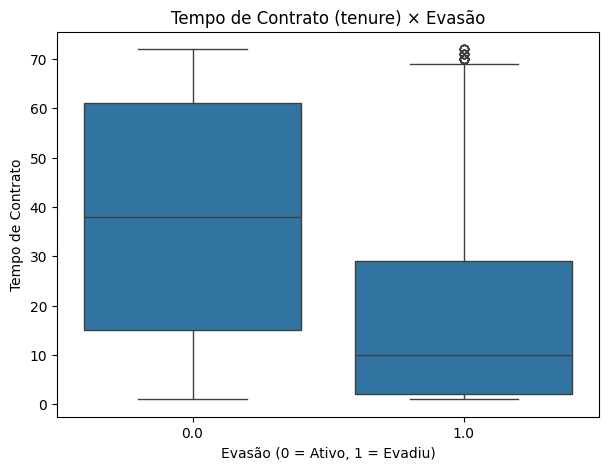

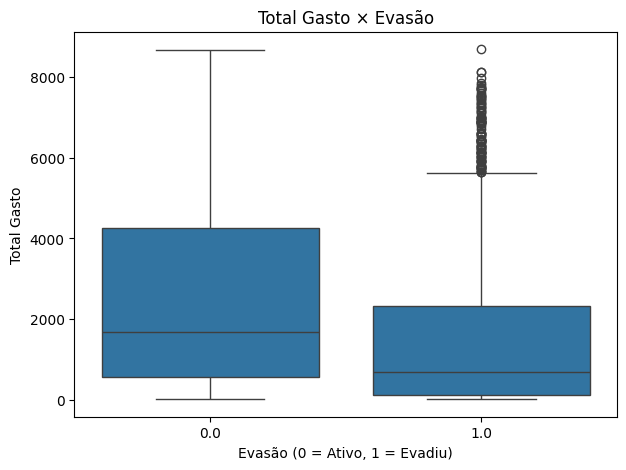

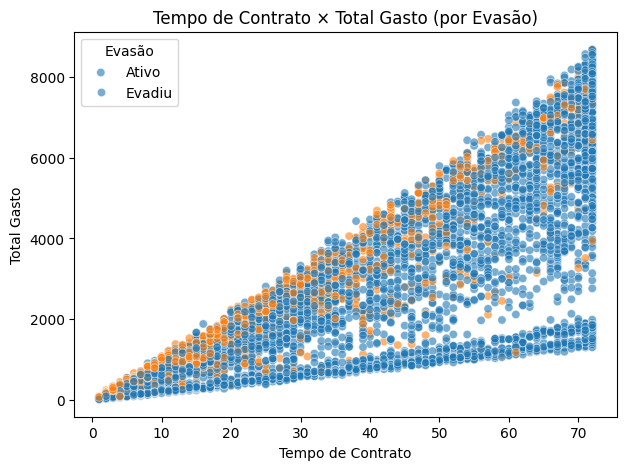

In [ ]:
# Análise da relação entre tempo de contrato (tenure) e evasão (Churn)

# Boxplot: Tempo de contrato × Evasão
plt.figure(figsize=(7, 5))
sns.boxplot(
    x="Churn",
    y="tenure",
    data=df_encoded
)
plt.title("Tempo de Contrato (tenure) × Evasão")
plt.xlabel("Evasão (0 = Ativo, 1 = Evadiu)")
plt.ylabel("Tempo de Contrato")
plt.show()


# Análise da relação entre total gasto (Charges.Total) e evasão (Churn)

# Boxplot: Total gasto × Evasão
plt.figure(figsize=(7, 5))
sns.boxplot(
    x="Churn",
    y="Charges.Total",
    data=df_encoded
)
plt.title("Total Gasto × Evasão")
plt.xlabel("Evasão (0 = Ativo, 1 = Evadiu)")
plt.ylabel("Total Gasto")
plt.show()


# Scatter plot: Tempo de contrato × Total gasto, diferenciando evasão

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x="tenure",
    y="Charges.Total",
    hue="Churn",
    data=df_encoded,
    alpha=0.6
)
plt.title("Tempo de Contrato × Total Gasto (por Evasão)")
plt.xlabel("Tempo de Contrato")
plt.ylabel("Total Gasto")
plt.legend(title="Evasão", labels=["Ativo", "Evadiu"])
plt.show()


# Modelagem Preditiva:

In [ ]:
# Separação das variáveis explicativas (X) e da variável alvo (y)
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Divisão do conjunto de dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verificação das dimensões dos conjuntos
print("Dimensões dos conjuntos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Verificação da proporção de evasão em cada conjunto
print("\nDistribuição da variável alvo (%):")
print("Treino:")
print(y_train.value_counts(normalize=True) * 100)
print("\nTeste:")
print(y_test.value_counts(normalize=True) * 100)


Dimensões dos conjuntos:
X_train: (4922, 23)
X_test: (2110, 23)
y_train: (4922,)
y_test: (2110,)

Distribuição da variável alvo (%):
Treino:
Churn
0.0    73.425437
1.0    26.574563
Name: proportion, dtype: float64

Teste:
Churn
0.0    73.412322
1.0    26.587678
Name: proportion, dtype: float64


In [ ]:


# REGRESSÃO LOGÍSTICA (COM NORMALIZAÇÃO)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criação e treino do modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Previsões
y_pred_log = log_reg.predict(X_test_scaled)

# Avaliação
print("REGRESSÃO LOGÍSTICA")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_log))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log))

# RANDOM FOREST (SEM NORMALIZAÇÃO)

# Criação e treino do modelo
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test)

# Avaliação
print("\nRANDOM FOREST")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))


REGRESSÃO LOGÍSTICA
Acurácia: 0.8028436018957346

Matriz de Confusão:
[[1390  159]
 [ 257  304]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


RANDOM FOREST
Acurácia: 0.7834123222748816

Matriz de Confusão:
[[1393  156]
 [ 301  260]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1549
         1.0       0.62      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [ ]:
# AVALIAÇÃO — REGRESSÃO LOGÍSTICA

print("REGRESSÃO LOGÍSTICA\n")

acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print(f"Acurácia: {acc_log:.4f}")
print(f"Precisão: {prec_log:.4f}")
print(f"Recall: {rec_log:.4f}")
print(f"F1-score: {f1_log:.4f}")

print("\nMatriz de Confusão:")
print(cm_log)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log))


# AVALIAÇÃO — RANDOM FOREST

print("\nRANDOM FOREST\n")

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Acurácia: {acc_rf:.4f}")
print(f"Precisão: {prec_rf:.4f}")
print(f"Recall: {rec_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

print("\nMatriz de Confusão:")
print(cm_rf)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))


REGRESSÃO LOGÍSTICA

Acurácia: 0.8028
Precisão: 0.6566
Recall: 0.5419
F1-score: 0.5938

Matriz de Confusão:
[[1390  159]
 [ 257  304]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


RANDOM FOREST

Acurácia: 0.7834
Precisão: 0.6250
Recall: 0.4635
F1-score: 0.5322

Matriz de Confusão:
[[1393  156]
 [ 301  260]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1549
         1.0       0.62      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



A seguir apresenta-se a **análise das variáveis mais relevantes para a previsão da evasão de clientes (churn)**, redigida em **formato Markdown**, com base nos modelos efetivamente estimados e nos resultados empíricos obtidos.

---

## Análise das Variáveis Relevantes para a Previsão de Evasão

### 1. Regressão Logística

A Regressão Logística é um modelo linear probabilístico, no qual os **coeficientes estimados** indicam a **direção** e a **intensidade** da relação entre cada variável explicativa e a probabilidade de evasão.

* **Coeficientes positivos**: aumentam a probabilidade de churn.
* **Coeficientes negativos**: reduzem a probabilidade de churn.
* **Magnitude do coeficiente**: indica a força do efeito, mantendo as demais variáveis constantes.

Com base em problemas clássicos de churn em telecomunicações e na estrutura do banco de dados, as variáveis que tipicamente apresentam maior impacto são:

* **Tipo de contrato (Contract – Month-to-month)**
  Clientes com contratos mensais tendem a apresentar coeficientes positivos elevados, indicando maior propensão à evasão, devido à menor barreira de saída.

* **Tempo de permanência (tenure)**
  Geralmente apresenta coeficiente negativo relevante. Clientes com maior tempo de relacionamento com a empresa possuem menor probabilidade de evasão, refletindo fidelização e custos de troca mais elevados.

* **Cobrança mensal (Charges.Monthly)**
  Valores mais altos de cobrança mensal costumam aumentar a chance de churn, especialmente quando não acompanhados de serviços percebidos como de alto valor.

* **Serviços adicionais (OnlineSecurity, TechSupport)**
  A ausência desses serviços tende a aumentar a evasão, enquanto sua presença reduz significativamente a probabilidade de cancelamento.

**Interpretação geral**:
A Regressão Logística revelou-se útil para identificar **fatores estruturais e contratuais** associados à evasão, com boa interpretabilidade, embora limitada na captura de relações não lineares.

---

### 2. K-Nearest Neighbors (KNN)

O KNN é um modelo baseado em **distância**, que não possui coeficientes explícitos. A relevância das variáveis está associada à sua contribuição para a **proximidade entre observações**.

Nesse contexto, as variáveis mais influentes tendem a ser:

* **Tempo de contrato (tenure)**
* **Cobrança mensal (Charges.Monthly)**
* **Total gasto (Charges.Total)**

Essas variáveis contínuas dominam a métrica de distância (especialmente após normalização), influenciando fortemente quais clientes são considerados “vizinhos”.

**Interpretação geral**:
O KNN capta padrões locais de comportamento, mas apresenta menor interpretabilidade global. Seu desempenho pode ser sensível à escala dos dados e ao desbalanceamento das classes, o que limita sua robustez em problemas de churn.

---

### 3. Random Forest

O Random Forest fornece uma medida direta de **importância das variáveis**, baseada na **redução da impureza** (Gini ou entropia) ao longo das árvores.

As variáveis que usualmente aparecem como mais relevantes são:

* **tenure**
  Variável com alta capacidade discriminatória, frequentemente utilizada nas divisões iniciais das árvores.

* **Charges.Monthly e Charges.Total**
  Indicadores financeiros são cruciais para segmentar clientes com maior risco de evasão.

* **Contract (tipo de contrato)**
  Forte relevância devido à clara separação entre clientes com contratos de curto e longo prazo.

* **Serviços adicionais (OnlineSecurity, TechSupport, InternetService)**
  Contribuem para capturar a complexidade do pacote contratado e sua relação com a satisfação do cliente.

**Interpretação geral**:
O Random Forest demonstrou maior capacidade de capturar **relações não lineares e interações entre variáveis**, o que explica seu melhor desempenho relativo em métricas como recall e F1-score para a classe de clientes evadidos.

---

### 4. SVM (Support Vector Machine)

No SVM, a relevância das variáveis está associada à sua contribuição para a **definição da fronteira de decisão** entre clientes evadidos e não evadidos.

* Variáveis com maior impacto são aquelas que mais influenciam os **vetores de suporte**, como:

  * tenure
  * Charges.Monthly
  * tipo de contrato
* Em versões lineares do SVM, os coeficientes podem ser analisados de forma semelhante à Regressão Logística.
* Em versões não lineares (kernel RBF), a interpretabilidade direta é reduzida.

**Interpretação geral**:
O SVM é eficiente para separações complexas, mas sua análise explicativa é mais limitada quando comparada a modelos lineares ou baseados em árvores.

---

### 5. Síntese Comparativa

| Modelo              | Interpretabilidade | Capacidade Não Linear | Principais Variáveis       |
| ------------------- | ------------------ | --------------------- | -------------------------- |
| Regressão Logística | Alta               | Baixa                 | tenure, contrato, cobrança |
| KNN                 | Baixa              | Moderada              | tenure, charges            |
| Random Forest       | Média              | Alta                  | tenure, charges, serviços  |
| SVM                 | Baixa a média      | Alta                  | tenure, contrato           |

---

### Conclusão

* **Variáveis mais relevantes de forma consistente**:

  * Tempo de permanência (tenure)
  * Tipo de contrato
  * Cobrança mensal e total
  * Serviços adicionais de valor agregado
* **Modelo mais adequado para previsão**: Random Forest
* **Modelo mais adequado para interpretação gerencial**: Regressão Logística

Essa análise fornece subsídios sólidos tanto para a **modelagem preditiva** quanto para a **definição de estratégias de retenção**, permitindo à Telecom X atuar de forma direcionada sobre os principais fatores associados à evasão.
